In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)

alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#convert DATE column as index
dates = pd.to_datetime(alta_df.DATE)

In [8]:
#chaining
snow = (alta_df
        .SNOW
        .rename(dates))

In [9]:
snow.head()

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
Name: SNOW, dtype: float64

<AxesSubplot:ylabel='Frequency'>

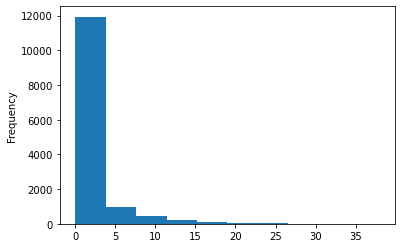

In [12]:
#histogram plots
snow.plot.hist()

<AxesSubplot:title={'center':'Snowfall Histogram (in)'}, ylabel='Frequency'>

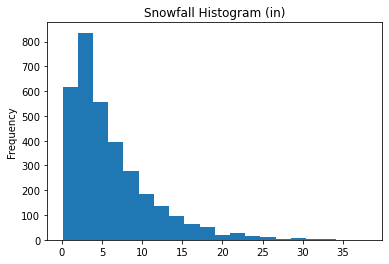

In [13]:
#The snow data is heavily skewed. We might want to drop the zero entries and try again. We
#will also change the number of bins:
snow[snow > 0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<AxesSubplot:>

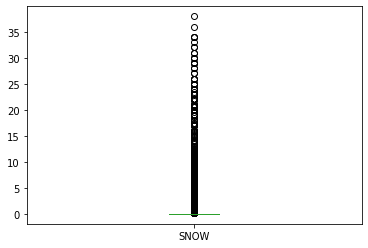

In [14]:
# Box plots
snow.plot.box()

<AxesSubplot:>

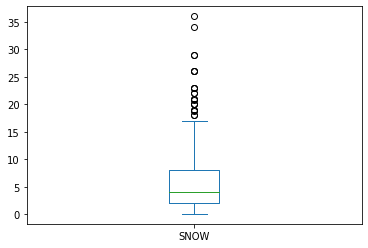

In [16]:
(snow
 [lambda s: (s.index.month == 1) & (s > 0)]
 .plot.box())

<AxesSubplot:>

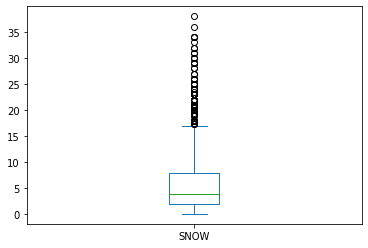

In [17]:
(snow
 [snow > 0]
 .plot.box())

<AxesSubplot:ylabel='Density'>

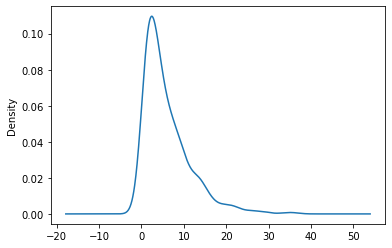

In [18]:
# KDE plot
(snow
 [lambda s: (s.index.month == 1) & (s > 0)]
 .plot.kde())

<AxesSubplot:ylabel='Density'>

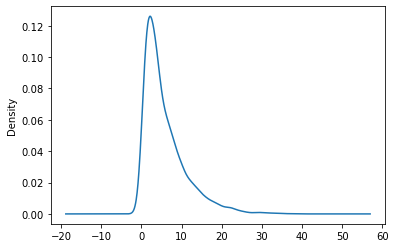

In [19]:
(snow[snow > 0]
 .plot.kde())

<AxesSubplot:>

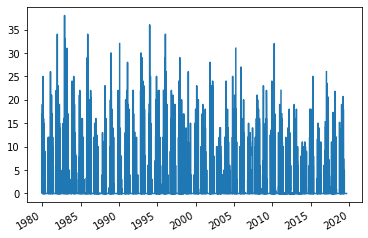

In [20]:
#line plot
snow.plot.line()

<AxesSubplot:>

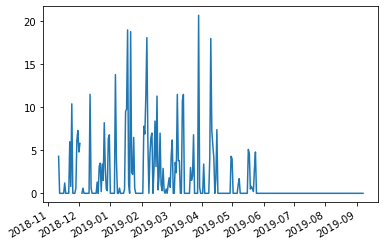

In [23]:
#plot last 300 records onlu
(snow
 .iloc[-300:]
 .plot.line())

<AxesSubplot:>

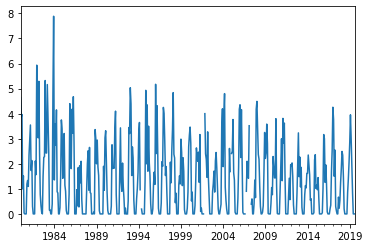

In [24]:
#Resampling
#Monthly resampling
(snow
 .resample('M')
 .mean()
 .plot.line())

In [27]:
#data is aggreated monthly by resample
(snow
 .resample('M')
 .mean())

1980-01-31    4.645161
1980-02-29    3.879310
1980-03-31    3.967742
1980-04-30    1.000000
1980-05-31    1.516129
                ...   
2019-05-31    0.838710
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
Freq: M, Name: SNOW, Length: 477, dtype: float64

<AxesSubplot:>

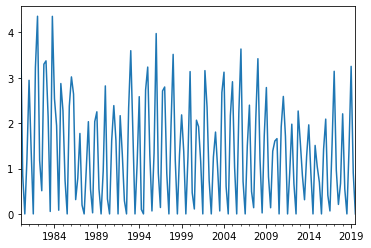

In [28]:
#Resampling
#Quarterly resampling
(snow
 .resample('Q')
 .mean()
 .plot.line())

In [30]:
(snow
 .resample('Q')
 .mean())

1980-03-31    4.170330
1980-06-30    0.857143
1980-09-30    0.000000
1980-12-31    1.206522
1981-03-31    2.944444
                ...   
2018-09-30    0.000000
2018-12-31    1.428571
2019-03-31    3.251111
2019-06-30    0.900000
2019-09-30    0.000000
Freq: Q-DEC, Name: SNOW, Length: 159, dtype: float64

In [31]:
#Series; Line plot with multiple aggregations (Unstack)
(snow
 .resample('Q')
 .quantile([.5, .9, .99])
 .unstack())

,0.50,0.90,0.99
1980-03-31,1.0,13.00,20.500
1980-06-30,0.0,4.00,9.100
1980-09-30,0.0,0.00,0.000
1980-12-31,0.0,5.00,12.000
1981-03-31,0.0,10.10,21.550
...,...,...,...
2018-09-30,0.0,0.00,0.000
2018-12-31,0.0,5.80,11.870
2019-03-31,0.6,10.85,19.187
2019-06-30,0.0,4.10,8.460


In [33]:
#Series; Line plot with multiple aggregations (Stack)
(snow
 .resample('Q')
 .quantile([.5, .9, .99]))

1980-03-31  0.50     1.00
            0.90    13.00
            0.99    20.50
1980-06-30  0.50     0.00
            0.90     4.00
                    ...  
2019-06-30  0.90     4.10
            0.99     8.46
2019-09-30  0.50     0.00
            0.90     0.00
            0.99     0.00
Name: SNOW, Length: 477, dtype: float64

<AxesSubplot:>

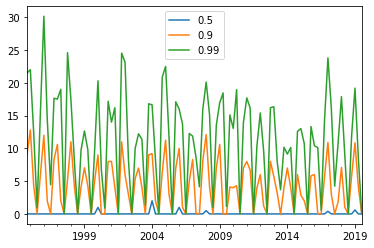

In [58]:
#Use Unstack to plot multiple line series
(snow
 .resample('Q')
 .quantile([.5, .9 ,.99])
 .unstack()
 .iloc[-100:]
 .plot.line())

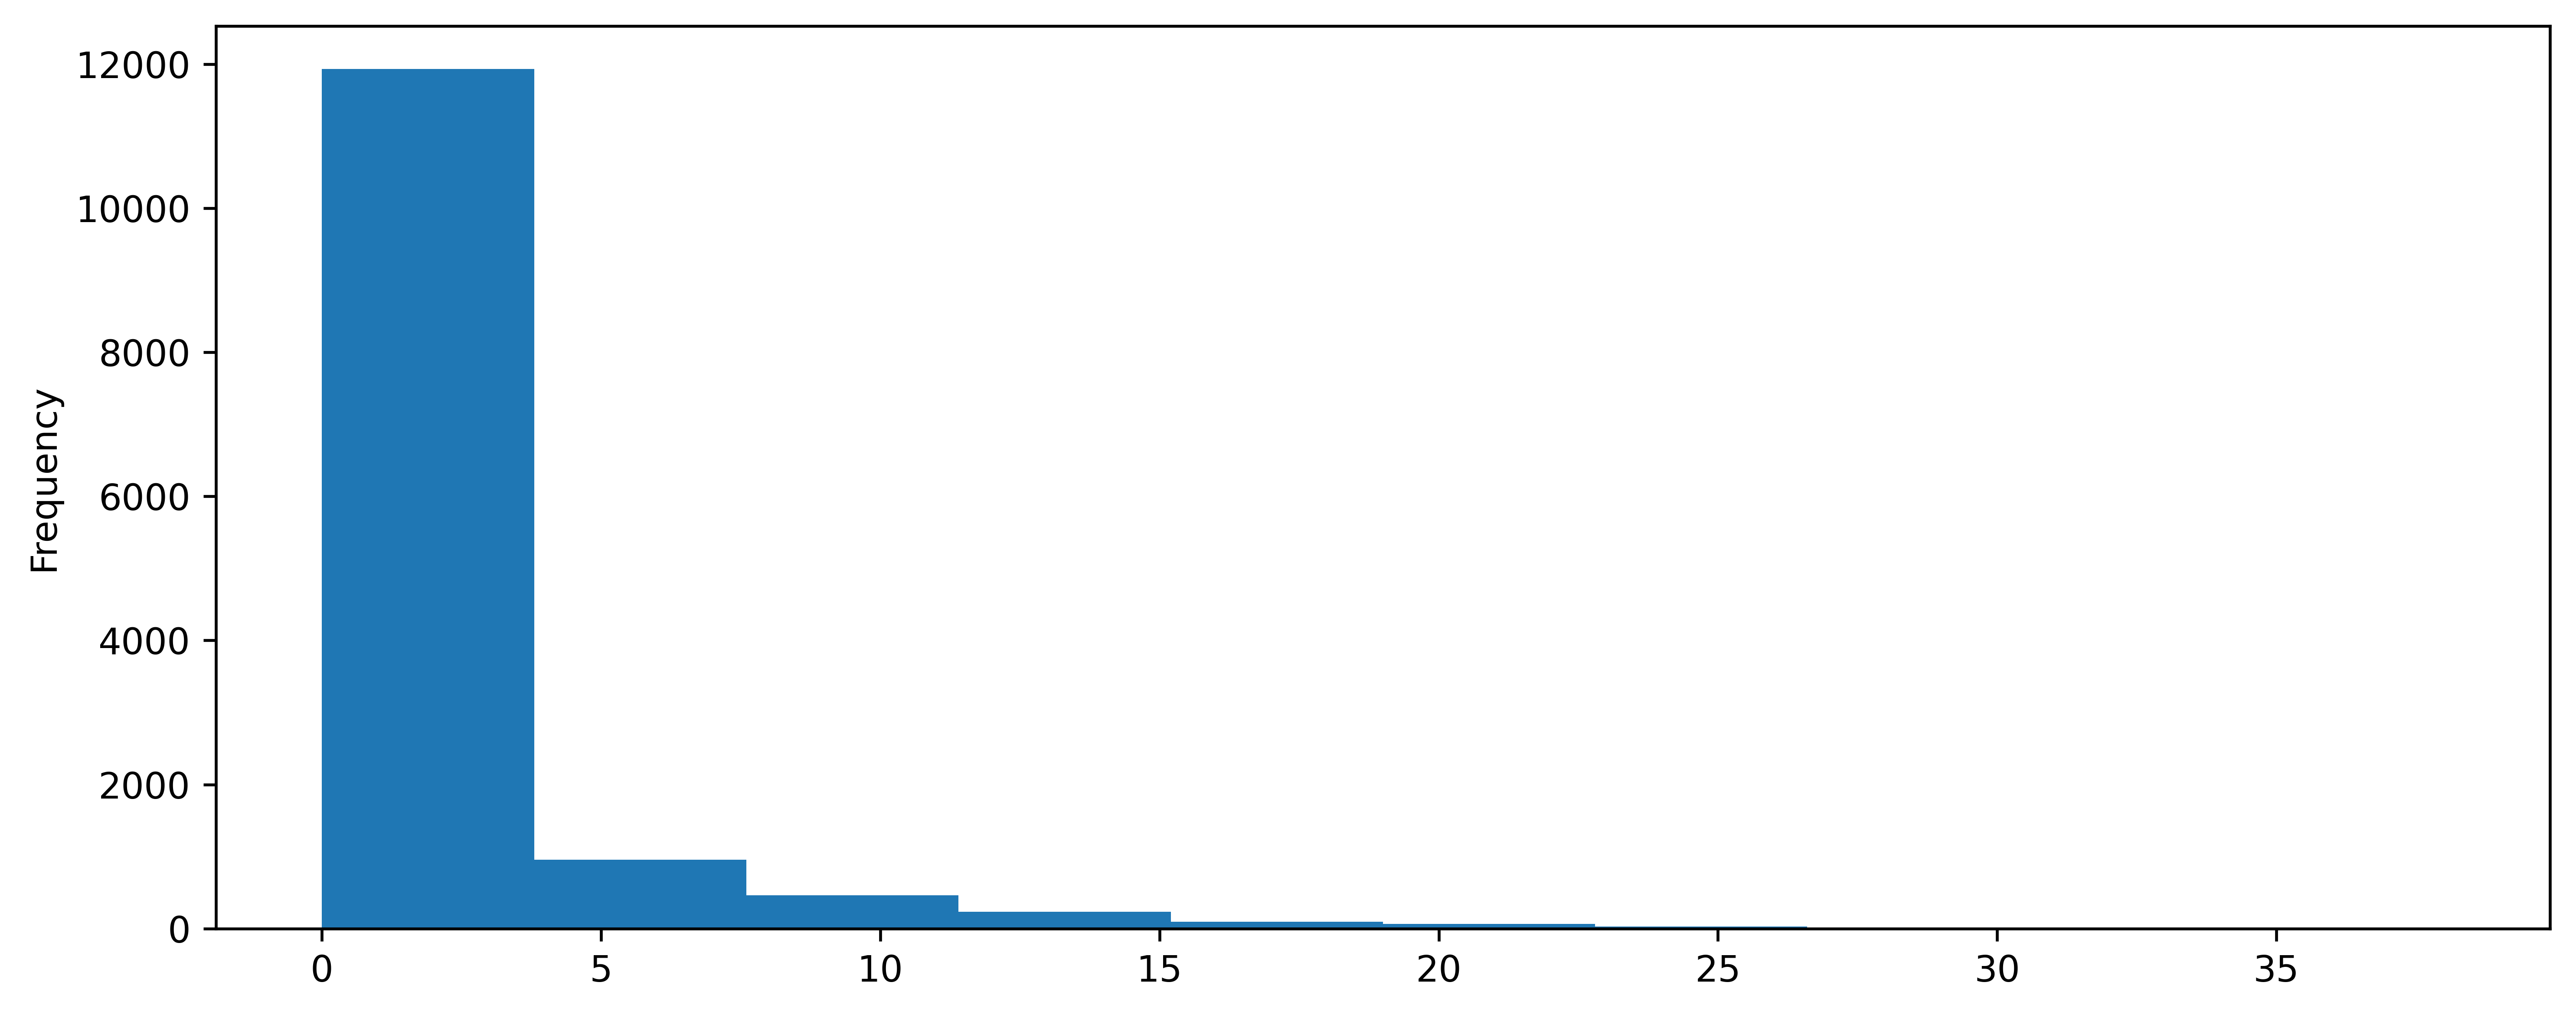

In [55]:
#STYLING (IMPORTANT)
import matplotlib
import seaborn as sns
color_palette = ["#440154" , "#482677" , "#404788" , "#33638d " , "#287d8e " ,
"#1f968b " , '#29af7f ', '#55c667 ', '#73d055 ', '# b8de29' , '#fde725 ']
fp = matplotlib.font_manager.FontProperties (fname = '/Fonts/roboto/Roboto-Condensed.ttf ')
with sns . plotting_context (rc = dict ( font =' Roboto ', palette = color_palette )):
    fig , ax = plt.subplots (dpi =600 , figsize =(10 ,4))
    snow.plot.hist()
    fig.tight_layout()

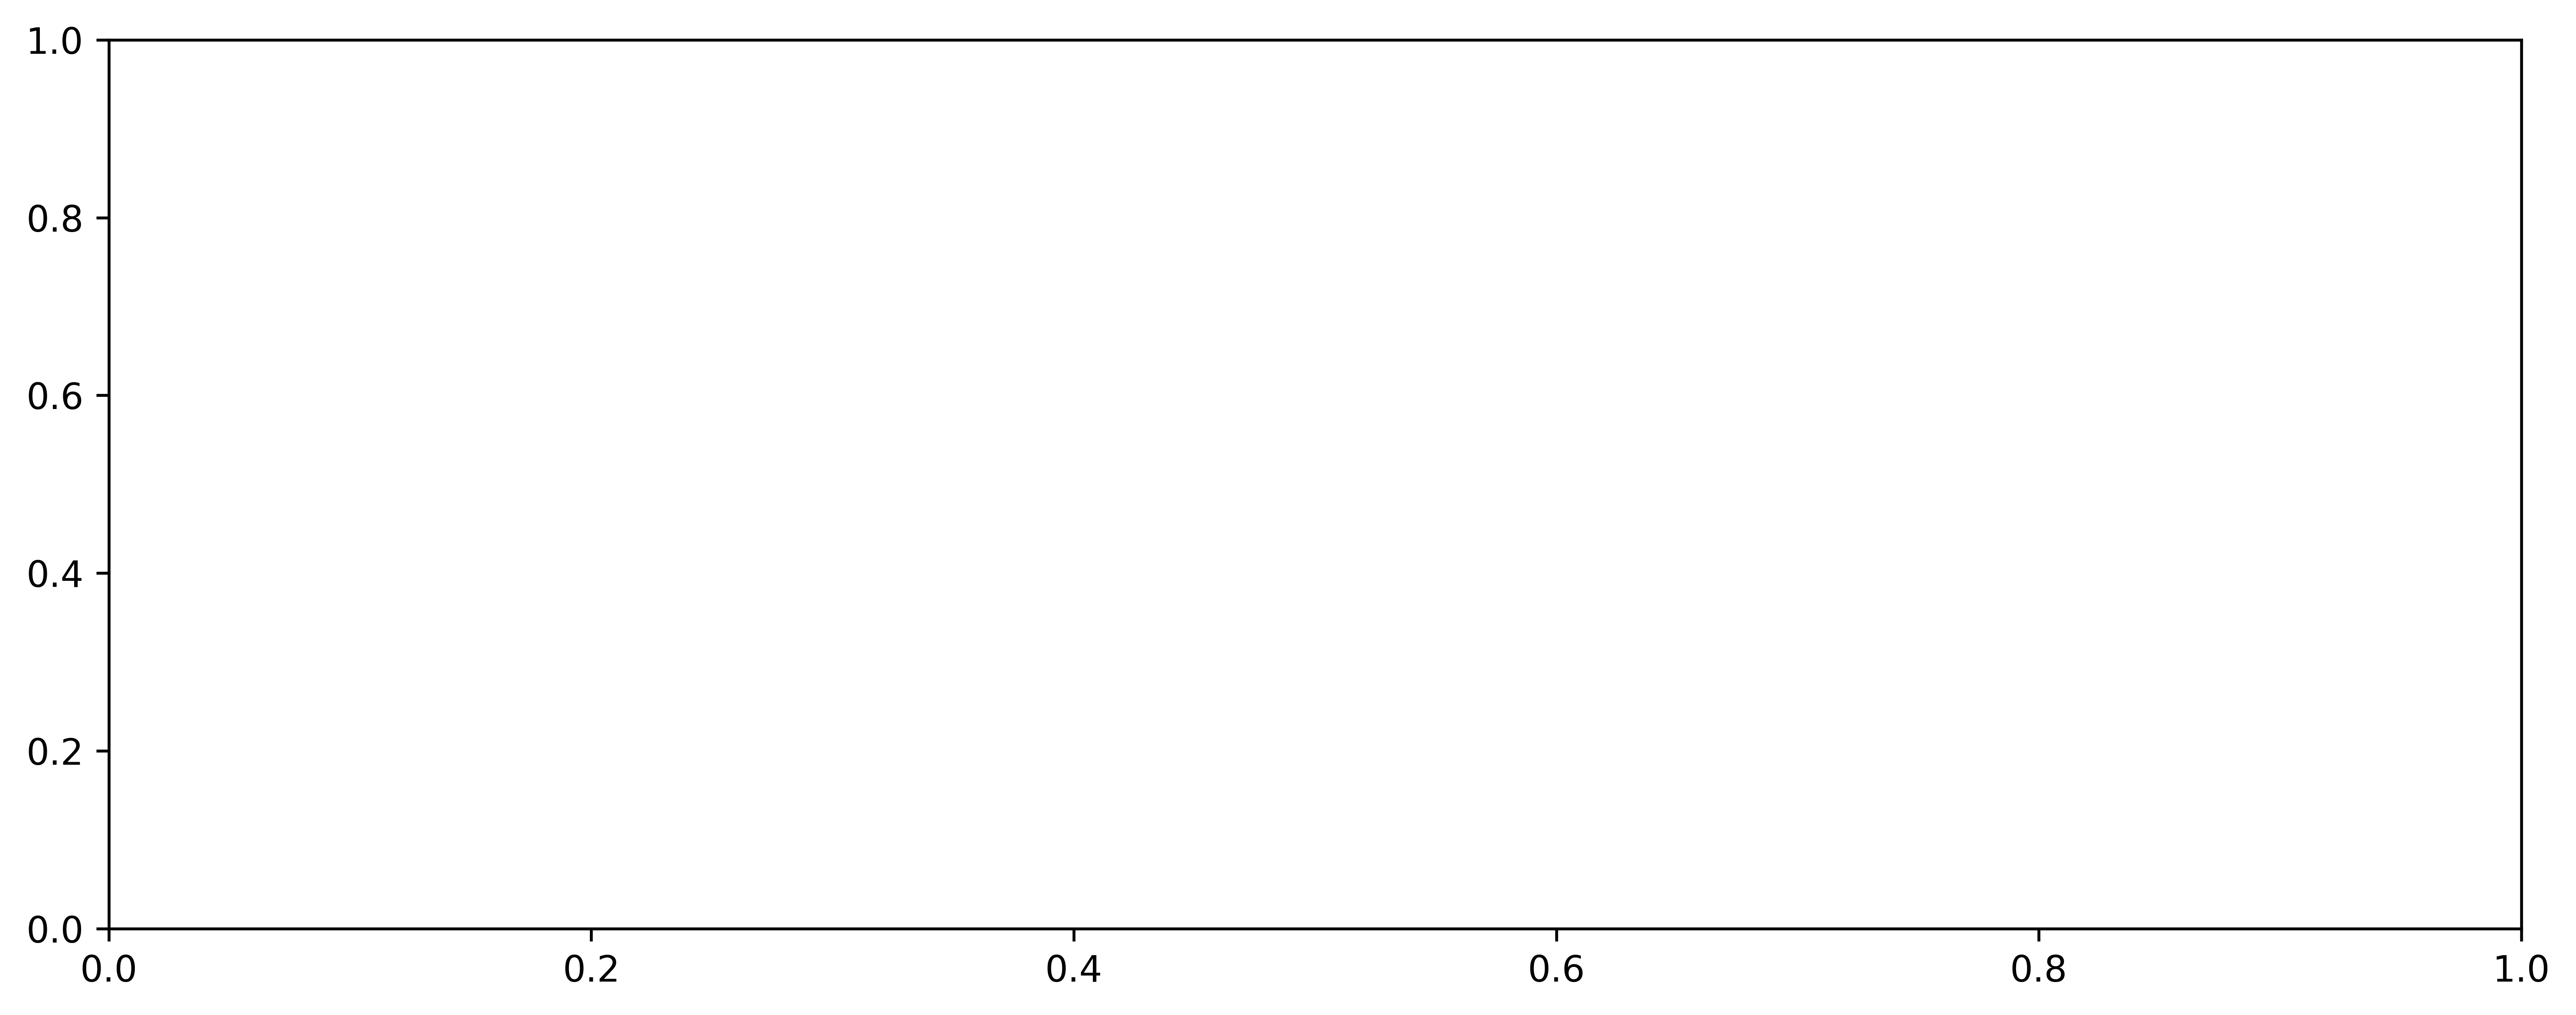

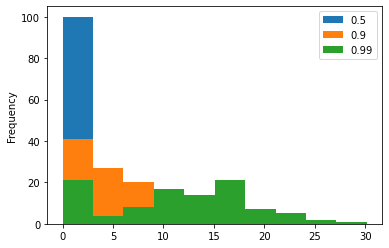

In [56]:
#STYLING (IMPORTANT)
with sns.plotting_context (rc = dict (font =' Roboto ', palette = color_palette )):
    fig , ax = plt.subplots (dpi =600 , figsize =(10 ,4))
    snow.resample('Q').quantile([.5, .9 ,.99]).unstack().iloc[-100:].plot.hist()
    fig.tight_layout()